<a href="https://colab.research.google.com/github/reneordosgoitia/Algorithmic-trading/blob/main/binance_api_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we are going to install the binance Rest API in order to access and use data. 

In [2]:
pip install python-binance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 288 kB 32.1 MB/s 
     |████████████████████████████████| 112 kB 70.0 MB/s 
     |████████████████████████████████| 749 kB 67.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


Import the libraries you are going to use.

In [3]:
import pandas as pd
import numpy as np
from binance.client import Client
import datetime as dt
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import matplotlib
matplotlib.style.use('seaborn')
# client configuration
api_key = 'xxx' 
api_secret = 'xxx'
client = Client(api_key, api_secret)

At this step, we are going to obtain only the cryptocurrencies at USDT terms.

In [4]:
tickers = pd.DataFrame(client.get_all_tickers()) #client.get_all_tickers() this is going to help us to obtain all the tickers.
list_symbols = tickers["symbol"]

In [6]:
filt = []
word = str("USDT")
for i in list_symbols:

  if word in i: # here we select only XXXUSDT pairs.

    filt.append(i)

filt1 = filt[:30]


In this section, we are going to construct the database of all the selected currencies with their OHLC, volumen, open time, close time.

In [7]:
interval="15m" #here we select the timeframe we are going to use in order to do the analysis.
Client.KLINE_INTERVAL_15MINUTE 
data = [pd.DataFrame(client.get_historical_klines(i, interval, "5 Oct,2022")) for i in filt1 ]

for i in range(len(data)-1,0,-1):
  
    if data[i].empty: #here me clean the data, deleting those with empty data.
      del data[i]
    
    data[i]["symbol"] = filt1[i]
  
    

In [ ]:
data[0].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore"]
data[0]["symbol"] = filt1[0]

In [ ]:
for i in range(len(data)):
  data[i].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore","symbol"]
  data[i].index = [dt.datetime.fromtimestamp(i/1000.0) for i in data[i].close_time]


In [ ]:
full_data = []

full_data = pd.concat(data)

In [ ]:
gd = full_data.groupby(["symbol",full_data.index]) #in order to visualize the data as a panel data, a cross section information related to a period of time X to Y for each cryptocurrencie.


In [ ]:
gd.first()

open_time  ... ignore
symbol                                          ...       
ADAUSDT 2022-10-05 00:14:59.999  1664928000000  ...      0
        2022-10-05 00:29:59.999  1664928900000  ...      0
        2022-10-05 00:44:59.999  1664929800000  ...      0
        2022-10-05 00:59:59.999  1664930700000  ...      0
        2022-10-05 01:14:59.999  1664931600000  ...      0
...                                        ...  ...    ...
XRPUSDT 2022-10-11 20:44:59.999  1665520200000  ...      0
        2022-10-11 20:59:59.999  1665521100000  ...      0
        2022-10-11 21:14:59.999  1665522000000  ...      0
        2022-10-11 21:29:59.999  1665522900000  ...      0
        2022-10-11 21:44:59.999  1665523800000  ...      0

[13923 rows x 12 columns]

In [ ]:
full = pd.DataFrame(full_data.set_index(['symbol',full_data.index])["close"])

In [ ]:
symbols = list(set(full.index.get_level_values(0)))


In [ ]:
cl = full.loc["BTCUSDT"][["close"]]

In [ ]:
cl.rename({"close": "BTCUSDT"}, axis = 1, inplace= True)

In [ ]:
for i in symbols:
  if i !="BTCUSDT":
    cl[i]= full.loc[i][["close"]]

In [ ]:
cl = cl.astype(float)

In [ ]:
dd = cl.corr()

In [ ]:
cl

,BTCUSDT,BNBUSDT,VENUSDT,XLMUSDT,BTTUSDT,XRPUSDT,HOTUSDT,ICXUSDT,BCCUSDT,WAVESUSDT,TRXUSDT,TUSDUSDT,ONTUSDT,LTCUSDT,ADAUSDT,ETCUSDT,ETHUSDT,VETUSDT,QTUMUSDT,EOSUSDT,PAXUSDT
2022-10-05 00:14:59.999,20247.79,296.1,0.1970,0.1189,0.3278,0.4763,0.002031,0.2410,8.91,3.848,0.06239,0.2813,0.2283,55.07,0.4358,27.89,1359.52,0.02389,2.904,1.200,7.766
2022-10-05 00:29:59.999,20211.46,295.7,0.1964,0.1180,0.3273,0.4775,0.002032,0.2400,8.89,3.841,0.06235,0.2808,0.2280,54.91,0.4345,27.83,1358.62,0.02389,2.900,1.201,7.793
2022-10-05 00:44:59.999,20196.23,295.4,0.1967,0.1180,0.3271,0.4777,0.002032,0.2402,8.88,3.833,0.06227,0.2811,0.2271,54.80,0.4331,27.77,1355.44,0.02385,2.890,1.200,7.827
2022-10-05 00:59:59.999,20181.95,295.2,0.1956,0.1183,0.3271,0.4787,0.002030,0.2396,8.88,3.831,0.06231,0.2805,0.2275,54.71,0.4338,27.77,1354.18,0.02381,2.888,1.197,7.773
2022-10-05 01:14:59.999,20223.84,295.4,0.1959,0.1180,0.3274,0.4795,0.002028,0.2397,8.89,3.835,0.06234,0.2804,0.2275,54.89,0.4335,27.82,1356.27,0.02384,2.894,1.197,7.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11 20:44:59.999,19055.85,271.2,0.1871,0.1178,0.3219,0.4960,0.001990,0.2259,8.06,3.510,0.06166,0.2610,0.2154,52.03,0.3942,23.98,1285.83,0.02287,2.704,1.049,7.196
2022-10-11 20:59:59.999,19021.78,270.5,0.1866,0.1173,0.3215,0.4911,0.001983,0.2255,8.06,3.497,0.06159,0.2603,0.2147,51.94,0.3935,23.83,1281.69,0.02281,2.697,1.046,7.152
2022-10-11 21:14:59.999,19044.40,270.8,0.1871,0.1172,0.3215,0.4915,0.001984,0.2256,8.05,3.502,0.06165,0.2601,0.2152,52.05,0.3937,23.90,1281.82,0.02282,2.700,1.046,7.168
2022-10-11 21:29:59.999,19020.11,270.4,0.1872,0.1171,0.3210,0.4891,0.001985,0.2255,8.03,3.497,0.06165,0.2600,0.2147,51.98,0.3935,23.81,1277.84,0.02275,2.696,1.045,7.146


In [ ]:
ven = np.log(cl["VENUSDT"])

In [ ]:
waves = np.log(cl["WAVESUSDT"])

In [ ]:
ven

2022-10-05 00:14:59.999   -1.624552
2022-10-05 00:29:59.999   -1.627602
2022-10-05 00:44:59.999   -1.626076
2022-10-05 00:59:59.999   -1.631684
2022-10-05 01:14:59.999   -1.630151
                             ...   
2022-10-11 20:44:59.999   -1.676112
2022-10-11 20:59:59.999   -1.678788
2022-10-11 21:14:59.999   -1.676112
2022-10-11 21:29:59.999   -1.675578
2022-10-11 21:44:59.999   -1.676112
Name: VENUSDT, Length: 663, dtype: float64

In [ ]:
waves

2022-10-05 00:14:59.999    1.347554
2022-10-05 00:29:59.999    1.345733
2022-10-05 00:44:59.999    1.343648
2022-10-05 00:59:59.999    1.343126
2022-10-05 01:14:59.999    1.344169
                             ...   
2022-10-11 20:44:59.999    1.255616
2022-10-11 20:59:59.999    1.251905
2022-10-11 21:14:59.999    1.253334
2022-10-11 21:29:59.999    1.251905
2022-10-11 21:44:59.999    1.251047
Name: WAVESUSDT, Length: 663, dtype: float64

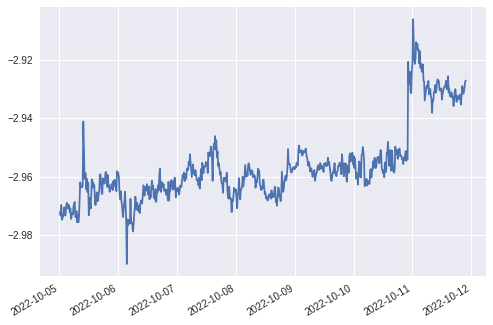

In [ ]:
(ven - waves).plot()

In [ ]:
cl

,BTCUSDT,BNBUSDT,VENUSDT,XLMUSDT,BTTUSDT,XRPUSDT,HOTUSDT,ICXUSDT,BCCUSDT,WAVESUSDT,TRXUSDT,TUSDUSDT,ONTUSDT,LTCUSDT,ADAUSDT,ETCUSDT,ETHUSDT,VETUSDT,QTUMUSDT,EOSUSDT,PAXUSDT
2022-10-05 00:14:59.999,627,296.1,0.1970,0.1189,0.3278,0.4763,0.002031,0.2410,8.91,3.848,0.06239,0.2813,0.2283,55.07,0.4358,27.89,1359.52,0.02389,2.904,1.200,7.766
2022-10-05 00:29:59.999,610,295.7,0.1964,0.1180,0.3273,0.4775,0.002032,0.2400,8.89,3.841,0.06235,0.2808,0.2280,54.91,0.4345,27.83,1358.62,0.02389,2.900,1.201,7.793
2022-10-05 00:44:59.999,595,295.4,0.1967,0.1180,0.3271,0.4777,0.002032,0.2402,8.88,3.833,0.06227,0.2811,0.2271,54.80,0.4331,27.77,1355.44,0.02385,2.890,1.200,7.827
2022-10-05 00:59:59.999,585,295.2,0.1956,0.1183,0.3271,0.4787,0.002030,0.2396,8.88,3.831,0.06231,0.2805,0.2275,54.71,0.4338,27.77,1354.18,0.02381,2.888,1.197,7.773
2022-10-05 01:14:59.999,617,295.4,0.1959,0.1180,0.3274,0.4795,0.002028,0.2397,8.89,3.835,0.06234,0.2804,0.2275,54.89,0.4335,27.82,1356.27,0.02384,2.894,1.197,7.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11 20:44:59.999,36,271.2,0.1871,0.1178,0.3219,0.4960,0.001990,0.2259,8.06,3.510,0.06166,0.2610,0.2154,52.03,0.3942,23.98,1285.83,0.02287,2.704,1.049,7.196
2022-10-11 20:59:59.999,12,270.5,0.1866,0.1173,0.3215,0.4911,0.001983,0.2255,8.06,3.497,0.06159,0.2603,0.2147,51.94,0.3935,23.83,1281.69,0.02281,2.697,1.046,7.152
2022-10-11 21:14:59.999,29,270.8,0.1871,0.1172,0.3215,0.4915,0.001984,0.2256,8.05,3.502,0.06165,0.2601,0.2152,52.05,0.3937,23.90,1281.82,0.02282,2.700,1.046,7.168
2022-10-11 21:29:59.999,11,270.4,0.1872,0.1171,0.3210,0.4891,0.001985,0.2255,8.03,3.497,0.06165,0.2600,0.2147,51.98,0.3935,23.81,1277.84,0.02275,2.696,1.045,7.146


In [ ]:
cl_mat = cl.corr(method = "pearson")

In [ ]:
sorted_mat = cl_mat.unstack().sort_values()

In [ ]:
sorted_mat

XLMUSDT    BNBUSDT     -0.522174
BNBUSDT    XLMUSDT     -0.522174
XLMUSDT    BTCUSDT     -0.464962
BTCUSDT    XLMUSDT     -0.464962
XRPUSDT    BNBUSDT     -0.421977
                          ...   
ETCUSDT    ETCUSDT      1.000000
ETHUSDT    ETHUSDT      1.000000
VETUSDT    VETUSDT      1.000000
WAVESUSDT  WAVESUSDT    1.000000
PAXUSDT    PAXUSDT      1.000000
Length: 441, dtype: float64

In [ ]:
dd

,BTCUSDT,BNBUSDT,VENUSDT,XLMUSDT,BTTUSDT,XRPUSDT,HOTUSDT,ICXUSDT,BCCUSDT,WAVESUSDT,TRXUSDT,TUSDUSDT,ONTUSDT,LTCUSDT,ADAUSDT,ETCUSDT,ETHUSDT,VETUSDT,QTUMUSDT,EOSUSDT,PAXUSDT
BTCUSDT,1.000000,0.968965,0.792521,-0.512027,0.248983,-0.436851,0.247896,0.557648,0.883464,0.806960,0.115479,0.704440,0.681386,0.854646,0.838782,0.818225,0.947685,0.903351,0.755045,0.940410,0.881453
BNBUSDT,0.968965,1.000000,0.772196,-0.522174,0.237259,-0.421977,0.217083,0.553267,0.885350,0.802815,0.037133,0.700653,0.656651,0.841614,0.825892,0.803776,0.909787,0.899388,0.734975,0.921440,0.868472
VENUSDT,0.792521,0.772196,1.000000,-0.051579,0.654830,0.090998,0.123409,0.883540,0.908502,0.967291,0.265189,0.809765,0.910634,0.802767,0.965870,0.964361,0.895362,0.821538,0.906855,0.900123,0.859816
XLMUSDT,-0.512027,-0.522174,-0.051579,1.000000,0.470458,0.912602,0.018802,0.319708,-0.145795,-0.047366,0.359074,0.045579,0.187931,-0.123417,-0.086846,-0.104380,-0.356393,-0.261210,0.112937,-0.335663,-0.219481
BTTUSDT,0.248983,0.237259,0.654830,0.470458,1.000000,0.552819,-0.080757,0.785052,0.536606,0.654571,0.176871,0.547470,0.743418,0.416989,0.620224,0.636662,0.428972,0.356280,0.663841,0.434882,0.384320
XRPUSDT,-0.436851,-0.421977,0.090998,0.912602,0.552819,1.000000,-0.024261,0.423468,-0.076845,0.092479,0.350587,0.092157,0.274833,-0.075569,0.030384,0.033879,-0.221188,-0.161197,0.179498,-0.238351,-0.096646
HOTUSDT,0.247896,0.217083,0.123409,0.018802,-0.080757,-0.024261,1.000000,0.159630,0.201679,0.106177,0.344361,0.175397,0.159998,0.358823,0.123852,0.040834,0.231677,0.324489,0.224360,0.073873,0.391669
ICXUSDT,0.557648,0.553267,0.883540,0.319708,0.785052,0.423468,0.159630,1.000000,0.845331,0.903137,0.414241,0.866168,0.964506,0.770190,0.883649,0.848575,0.696816,0.720271,0.934021,0.725755,0.748572
BCCUSDT,0.883464,0.885350,0.908502,-0.145795,0.536606,-0.076845,0.201679,0.845331,1.000000,0.947538,0.248995,0.910957,0.902727,0.934798,0.959096,0.920647,0.899109,0.915816,0.944655,0.949159,0.896532
WAVESUSDT,0.806960,0.802815,0.967291,-0.047366,0.654571,0.092479,0.106177,0.903137,0.947538,1.000000,0.296977,0.852255,0.929696,0.835614,0.989027,0.980006,0.902626,0.858915,0.928688,0.920604,0.874809


In [ ]:
sorted = dd.unstack().sort_values()
  

In [ ]:
sorted = sorted[sorted < 1]

In [ ]:
sorted.tail(30)

BCCUSDT    QTUMUSDT     0.944655
QTUMUSDT   BCCUSDT      0.944655
WAVESUSDT  BCCUSDT      0.947538
BCCUSDT    WAVESUSDT    0.947538
ETHUSDT    BTCUSDT      0.947685
BTCUSDT    ETHUSDT      0.947685
ETHUSDT    EOSUSDT      0.948470
EOSUSDT    ETHUSDT      0.948470
BCCUSDT    EOSUSDT      0.949159
EOSUSDT    BCCUSDT      0.949159
ADAUSDT    BCCUSDT      0.959096
BCCUSDT    ADAUSDT      0.959096
VENUSDT    ETCUSDT      0.964361
ETCUSDT    VENUSDT      0.964361
ONTUSDT    ICXUSDT      0.964506
ICXUSDT    ONTUSDT      0.964506
ADAUSDT    VENUSDT      0.965870
VENUSDT    ADAUSDT      0.965870
           WAVESUSDT    0.967291
WAVESUSDT  VENUSDT      0.967291
BTCUSDT    BNBUSDT      0.968965
BNBUSDT    BTCUSDT      0.968965
ONTUSDT    QTUMUSDT     0.976297
QTUMUSDT   ONTUSDT      0.976297
ETCUSDT    WAVESUSDT    0.980006
WAVESUSDT  ETCUSDT      0.980006
ADAUSDT    ETCUSDT      0.981451
ETCUSDT    ADAUSDT      0.981451
ADAUSDT    WAVESUSDT    0.989027
WAVESUSDT  ADAUSDT      0.989027
dtype: flo

In [ ]:
ada = cl["LTCUSDT"]
waves = cl["VETUSDT"]

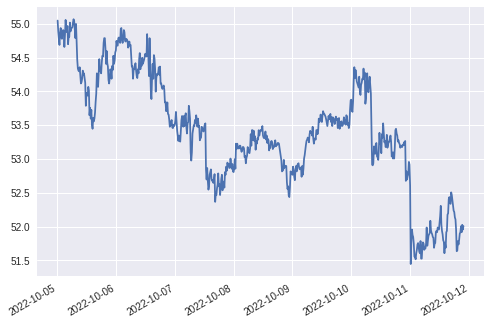

In [ ]:
(ada-waves).plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
ada_df = adfuller(ven)
waves_df = adfuller(waves)
sprd = adfuller(ada - waves )

In [ ]:
print(ada_df[1])
print(waves_df[1])
print(sprd[1])


0.8429739449604068
0.9037868852107673
0.4961776857475899


In [ ]:
cl["BTCUSDT"]+ cl["BTCUSDT"]

2022-10-05 00:14:59.999    40495.58
2022-10-05 00:29:59.999    40422.92
2022-10-05 00:44:59.999    40392.46
2022-10-05 00:59:59.999    40363.90
2022-10-05 01:14:59.999    40447.68
                             ...   
2022-10-11 20:44:59.999    38111.70
2022-10-11 20:59:59.999    38043.56
2022-10-11 21:14:59.999    38088.80
2022-10-11 21:29:59.999    38040.22
2022-10-11 21:44:59.999    38071.02
Name: BTCUSDT, Length: 663, dtype: float64

In [ ]:
cl

,BTCUSDT,BNBUSDT,ETCUSDT,EOSUSDT,ETHUSDT,BTTUSDT,ADAUSDT,ICXUSDT,XLMUSDT,LTCUSDT,...,XRPUSDT,HOTUSDT,TUSDUSDT,TRXUSDT,VETUSDT,QTUMUSDT,PAXUSDT,VENUSDT,BCCUSDT,WAVESUSDT
2022-10-05 00:14:59.999,20247.79,296.1,27.89,1.200,1359.52,0.3278,0.4358,0.2410,0.1189,55.07,...,0.4763,0.002031,0.2813,0.06239,0.02389,2.904,7.766,0.1970,8.91,3.848
2022-10-05 00:29:59.999,20211.46,295.7,27.83,1.201,1358.62,0.3273,0.4345,0.2400,0.1180,54.91,...,0.4775,0.002032,0.2808,0.06235,0.02389,2.900,7.793,0.1964,8.89,3.841
2022-10-05 00:44:59.999,20196.23,295.4,27.77,1.200,1355.44,0.3271,0.4331,0.2402,0.1180,54.80,...,0.4777,0.002032,0.2811,0.06227,0.02385,2.890,7.827,0.1967,8.88,3.833
2022-10-05 00:59:59.999,20181.95,295.2,27.77,1.197,1354.18,0.3271,0.4338,0.2396,0.1183,54.71,...,0.4787,0.002030,0.2805,0.06231,0.02381,2.888,7.773,0.1956,8.88,3.831
2022-10-05 01:14:59.999,20223.84,295.4,27.82,1.197,1356.27,0.3274,0.4335,0.2397,0.1180,54.89,...,0.4795,0.002028,0.2804,0.06234,0.02384,2.894,7.811,0.1959,8.89,3.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11 23:59:59.999,19060.00,271.4,23.75,1.043,1280.11,0.3216,0.3908,0.2247,0.1161,52.03,...,0.4861,0.001981,0.2614,0.06166,0.02275,2.694,7.135,0.1863,8.03,3.499
2022-10-12 00:14:59.999,19065.98,271.9,23.81,1.041,1279.55,0.3215,0.3907,0.2246,0.1160,51.98,...,0.4857,0.001984,0.2613,0.06158,0.02277,2.686,7.130,0.1867,8.03,3.489
2022-10-12 00:29:59.999,19085.97,271.9,24.00,1.046,1282.89,0.3212,0.3919,0.2256,0.1160,52.11,...,0.4874,0.001994,0.2619,0.06158,0.02283,2.699,7.159,0.1871,8.07,3.501
2022-10-12 00:44:59.999,19094.60,272.3,24.34,1.051,1285.70,0.3207,0.3930,0.2263,0.1166,52.30,...,0.4890,0.001994,0.2627,0.06144,0.02292,2.709,7.182,0.1875,8.09,3.518


In [ ]:
import statsmodels.tsa.stattools as ts



In [ ]:

def cointegrated_pairs(data):
    n =  (len(data.columns) -1)
    stocks = data.iloc[:,1:].columns.values #pulls all stock names 
    data = data.to_numpy()
    pvalue_matrix = np.zeros((n,n),dtype = float)
    pairs = np.empty((n*n,2),dtype=object)
    m = 0
    #loop through all possilbe combintions of stocks ie 3!=6
    for i in range(0,n):
        for j in range(0,n):
            S1 = data[:,i+1]
            S2 = data[:,j+1]
            result = ts.coint(S1,S2)
            pvalue_matrix[i,j] = result[1]
            #storing all paris in matrix form
            if (result[1] < 0.05) & (i!=j):
                pairs[m,0] = stocks[i]
                pairs[m,1] = stocks[j] 
                m = m +1
    return pvalue_matrix,  pairs

In [ ]:
data = cl

In [ ]:
def cointegrated_pairs(data):
    n =  (len(data.columns) -1)
    stocks = data.iloc[:,1:].columns.values #pulls all stock names 
    data = data.to_numpy()
    pvalue_matrix = np.zeros((n,n),dtype = float)
    pairs = np.empty((n*n,2),dtype=object)
    m = 0
    #loop through all possilbe combintions of stocks ie 3!=6
    for i in range(0,n):
        for j in range(0,n):
            S1 = data[:,i+1]
            S2 = data[:,j+1]
            result = ts.coint(S1,S2)
            pvalue_matrix[i,j] = result[1]
            #storing all paris in matrix form
            if (result[1] < 0.05) & (i!=j):
                pairs[m,0] = stocks[i]
                pairs[m,1] = stocks[j] 
                m = m +1
    return pvalue_matrix,  pairs

In [ ]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('ETCUSDT', 'VENUSDT'), ('ETCUSDT', 'WAVESUSDT'), ('EOSUSDT', 'ETHUSDT'), ('EOSUSDT', 'VENUSDT'), ('ETHUSDT', 'PAXUSDT'), ('ADAUSDT', 'VENUSDT'), ('ADAUSDT', 'WAVESUSDT'), ('ONTUSDT', 'VENUSDT'), ('HOTUSDT', 'TRXUSDT'), ('VENUSDT', 'BCCUSDT'), ('VENUSDT', 'WAVESUSDT')]


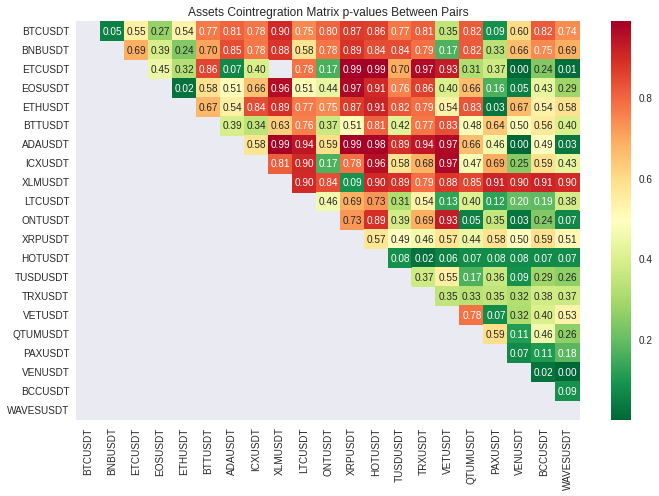

In [ ]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(data)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = data.columns,
                yticklabels = data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
#plt.savefig('images/chart2', dpi=300)

In [ ]:
coint(data["BNBUSDT"], data["BNBUSDT"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1608: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning,


(-inf, 0.0, array([-3.91273862, -3.34519698, -3.05073923]))